In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight') 

In [10]:
df = pd.read_csv('archive (4)/PJME_hourly.csv')
print(df.head())
df= df.set_index('Datetime')

              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0


In [12]:
df.index = pd.to_datetime(df.index)

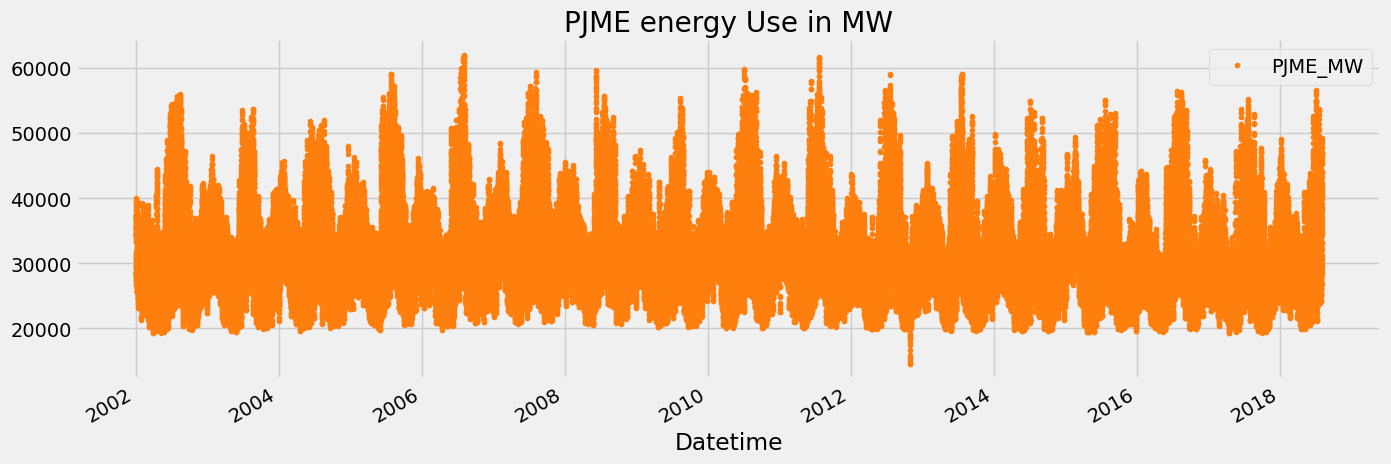

In [23]:
df.plot(
    style='.',
    figsize=(15,5),
    color =color_pal[1],
    title='PJME energy Use in MW'
)
plt.show()

In [19]:
train = df.loc[df.index < '01-01-2015']
train

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2014-01-01 20:00:00,36193.0
2014-01-01 21:00:00,35601.0
2014-01-01 22:00:00,34242.0


In [21]:
test = df.loc[df.index > '01-01-2015']
test

,PJME_MW
Datetime,
2015-12-31 01:00:00,24305.0
2015-12-31 02:00:00,23156.0
2015-12-31 03:00:00,22514.0
2015-12-31 04:00:00,22330.0
2015-12-31 05:00:00,22773.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


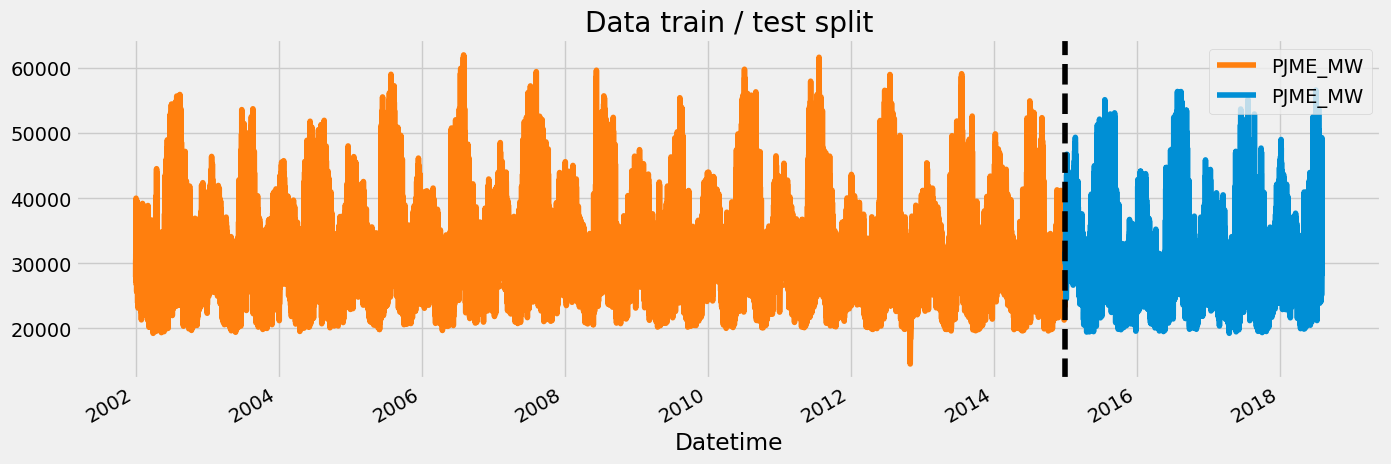

In [29]:
fig , ax = plt.subplots(figsize = (15,5))

train.plot(ax = ax , label = 'Traing set' , title='Data train / test split' ,color = color_pal[1])
test.plot(ax = ax , label = 'Test set')
ax.axvline('01-01-2015', color = 'black', ls = '--')


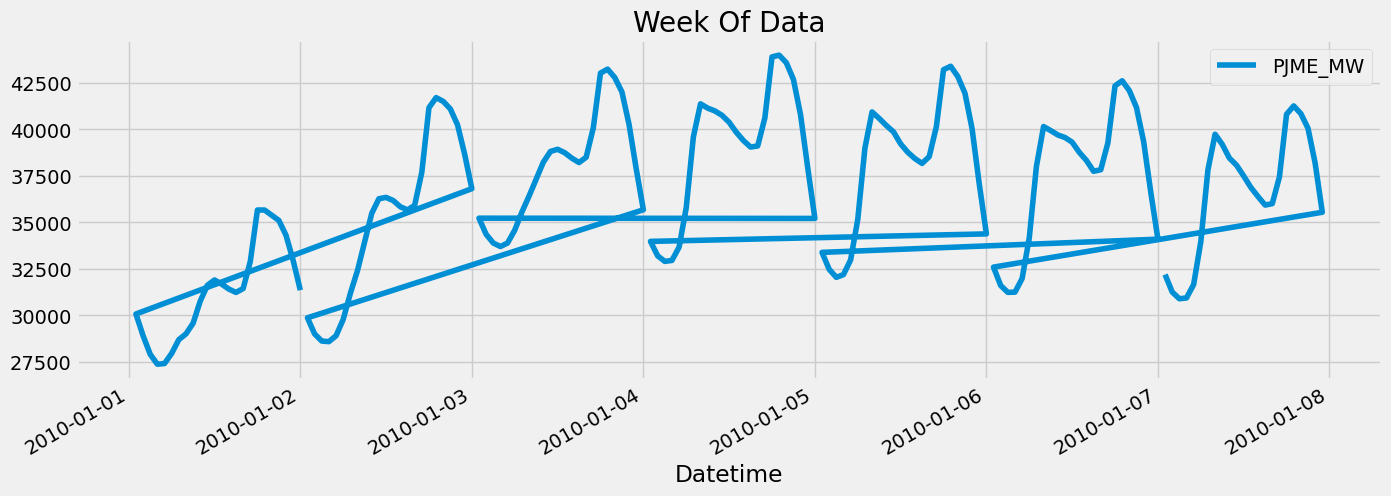

In [32]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [35]:
def CreateFeature(df):
    df = df.copy()
    df['hour'] = df.index.hour 
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter 
    df['month'] = df.index.month 
    df['year'] = df.index.year 
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth']  = df.index.day 
    df['weekofyear'] = df.index.isocalendar().week 
    return df 

df = CreateFeature(df)


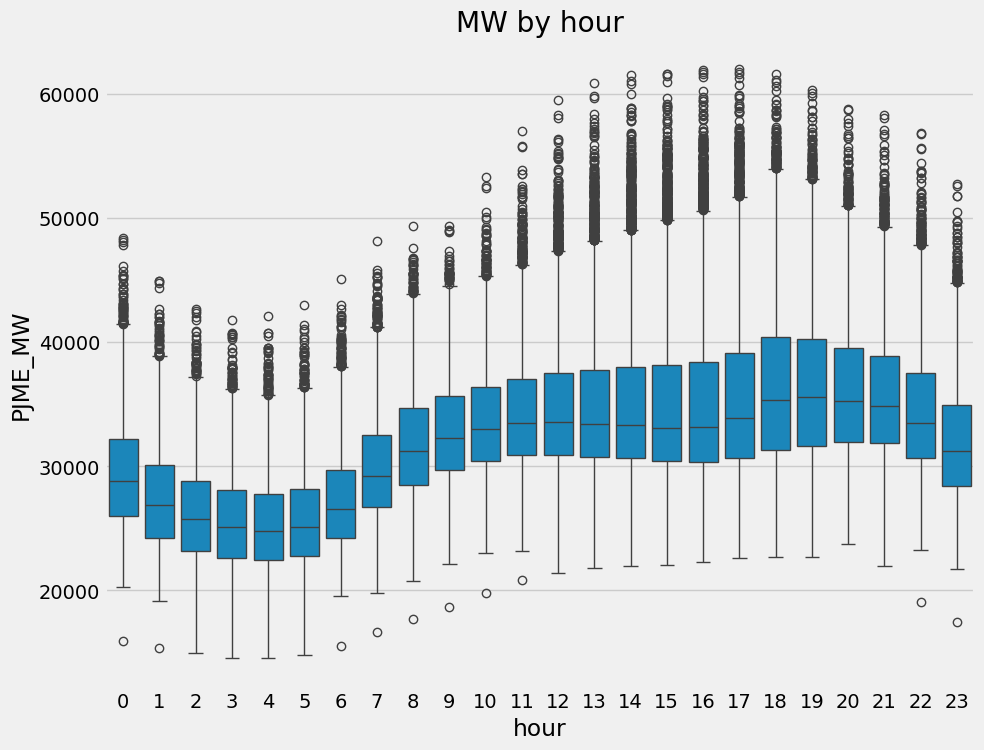

In [38]:
fig , ax =  plt.subplots(figsize = (10,8))
sns.boxplot(data=df , x = 'hour' , y = 'PJME_MW')
ax.set_title('MW by hour')
plt.show()

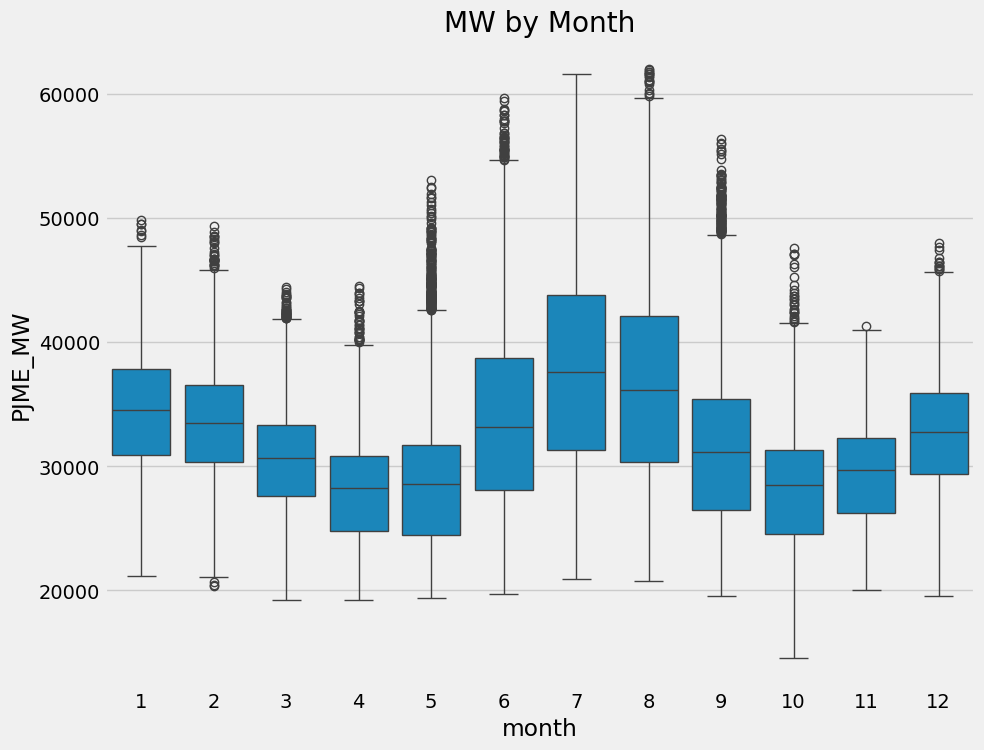

In [40]:
fig , ax =  plt.subplots(figsize = (10,8))
sns.boxplot(data=df , x = 'month' , y = 'PJME_MW')
ax.set_title('MW by Month')
plt.show()

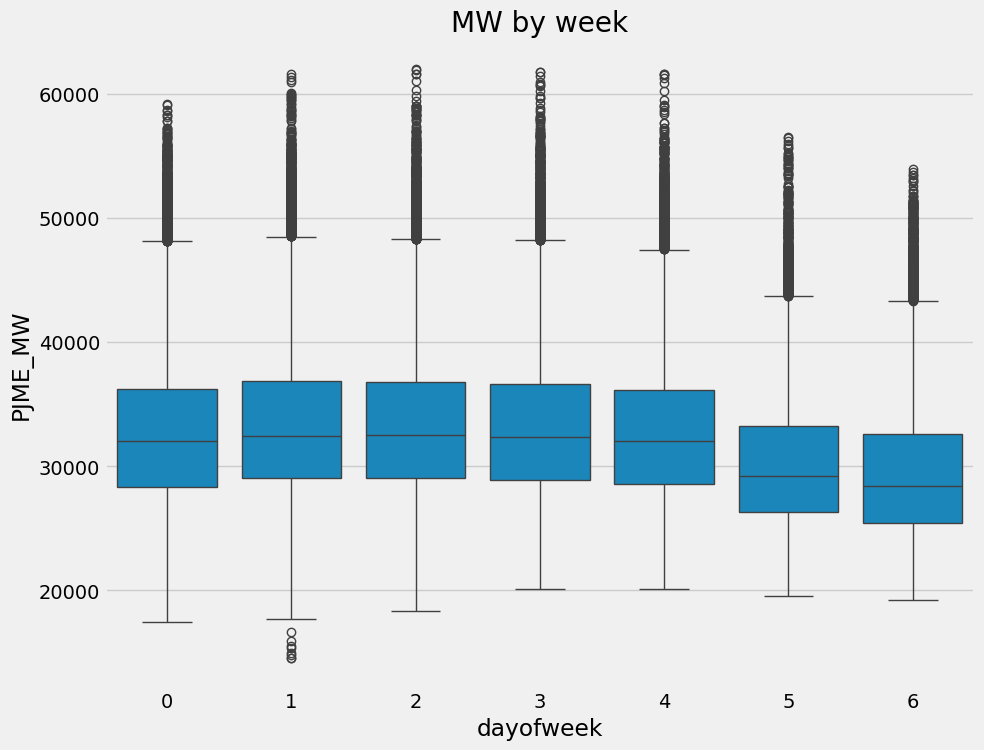

In [43]:
fig , ax =  plt.subplots(figsize = (10,8))
sns.boxplot(data=df , x = 'dayofweek' , y = 'PJME_MW')
ax.set_title('MW by week')
plt.show()

In [53]:
train = CreateFeature(train)
test = CreateFeature(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES] 
Y_train = train[TARGET]
X_train

,dayofyear,hour,dayofweek,quarter,month,year
Datetime,,,,,,
2002-12-31 01:00:00,365,1,1,4,12,2002
2002-12-31 02:00:00,365,2,1,4,12,2002
2002-12-31 03:00:00,365,3,1,4,12,2002
2002-12-31 04:00:00,365,4,1,4,12,2002
2002-12-31 05:00:00,365,5,1,4,12,2002
...,...,...,...,...,...,...
2014-01-01 20:00:00,1,20,2,1,1,2014
2014-01-01 21:00:00,1,21,2,1,1,2014
2014-01-01 22:00:00,1,22,2,1,1,2014


In [54]:
X_test = test[FEATURES]
Y_test  =  test[TARGET]
X_test

,dayofyear,hour,dayofweek,quarter,month,year
Datetime,,,,,,
2015-12-31 01:00:00,365,1,3,4,12,2015
2015-12-31 02:00:00,365,2,3,4,12,2015
2015-12-31 03:00:00,365,3,3,4,12,2015
2015-12-31 04:00:00,365,4,3,4,12,2015
2015-12-31 05:00:00,365,5,3,4,12,2015
...,...,...,...,...,...,...
2018-01-01 20:00:00,1,20,0,1,1,2018
2018-01-01 21:00:00,1,21,0,1,1,2018
2018-01-01 22:00:00,1,22,0,1,1,2018


In [58]:
Model = xgb.XGBRegressor(
    base_score= 0.5, #intial prediction
    booster = 'gbtree' ,#uses decision trees as the basic building blocks to make predictions.
    n_estimators = 1000 , #buildup to 1000 trees 
    early_stopping_rounds =50 , #stop early to avoid overfitting 
     objective='reg:linear',
    max_depth = 3 , #Each decision tree can only go 3 levels deep
    learning_rate = 0.01  
)

Model.fit(X_train , Y_train , eval_set = [(X_train,Y_train),(X_test,Y_test)],verbose =100)
#verbose tells to print every 100 iterations 

[0]	validation_0-rmse:32605.13970	validation_1-rmse:31657.12997


C:\Users\arham\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:58:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12584.35462	validation_1-rmse:11747.21982
[200]	validation_0-rmse:5837.33066	validation_1-rmse:5363.54842
[300]	validation_0-rmse:3923.28511	validation_1-rmse:4020.49856
[400]	validation_0-rmse:3447.54638	validation_1-rmse:3860.64442
[500]	validation_0-rmse:3288.19208	validation_1-rmse:3816.42645
[600]	validation_0-rmse:3206.55619	validation_1-rmse:3779.08421
[700]	validation_0-rmse:3153.61368	validation_1-rmse:3754.49489
[800]	validation_0-rmse:3114.34038	validation_1-rmse:3738.41767
[900]	validation_0-rmse:3084.39550	validation_1-rmse:3730.05411
[989]	validation_0-rmse:3059.85847	validation_1-rmse:3727.98037


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

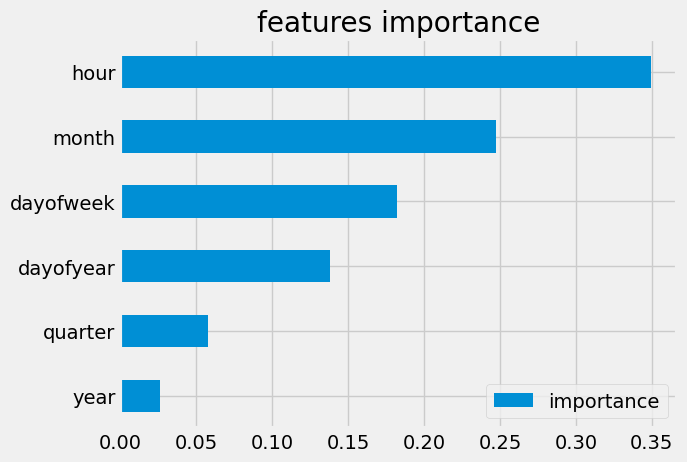

In [63]:
features = pd.DataFrame(data=Model.feature_importances_,
                        index = Model.feature_names_in_,
                        columns=['importance'])

features.sort_values('importance').plot(kind='barh' ,title='features importance')
plt.show()

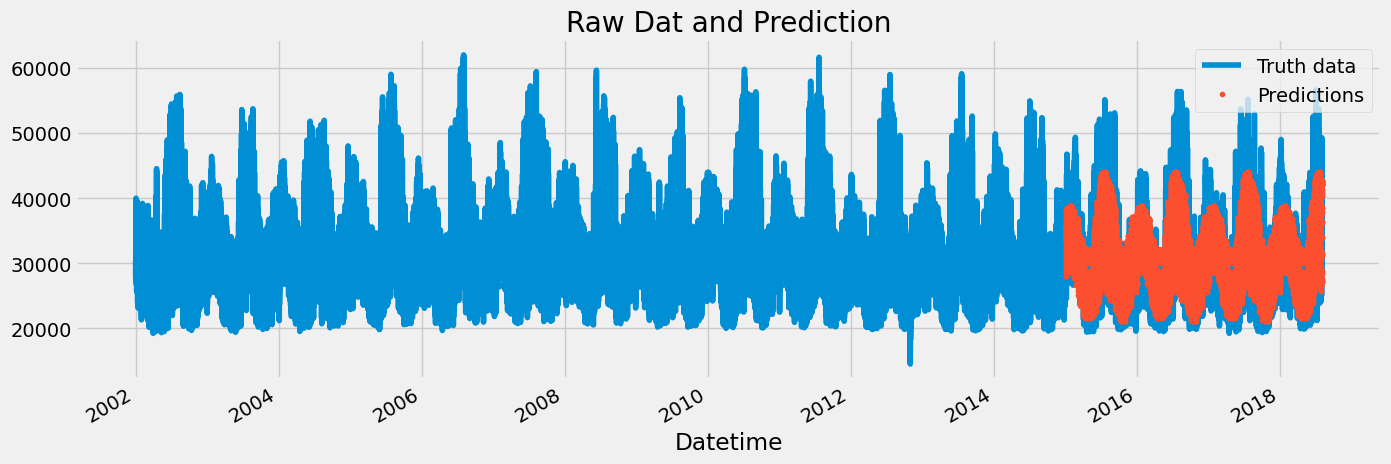

In [66]:
test['prediction'] = Model.predict(X_test)
df = df.merge(test[['prediction']] , how = 'left' , left_index=True , right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax , style='.')
plt.legend(['Truth data','Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

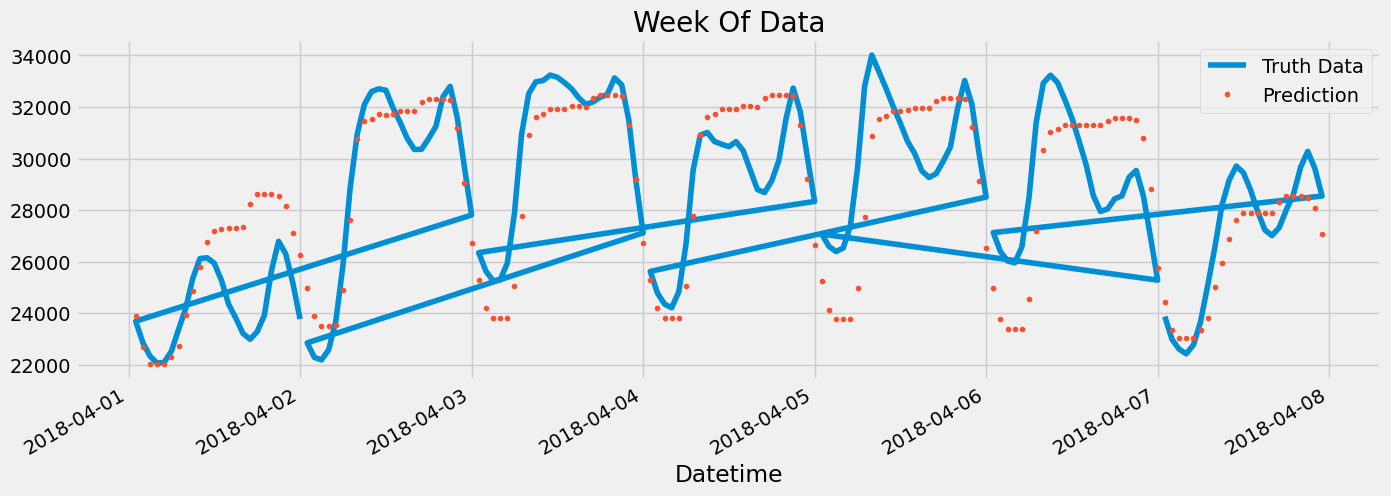

In [67]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [68]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3726.83


In [69]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2016-08-13    12879.484619
2016-08-14    12772.887207
2015-02-20    11186.031494
2016-09-09    10966.513102
2016-09-10    10889.102214
2018-01-06    10642.975830
2016-08-12    10041.172689
2015-02-21     9988.168783
2015-02-16     9900.809326
2018-01-07     9852.571370
Name: error, dtype: float64